# HATE SPEECH DETECTION

## DATA PREPROCESSING 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from fastai.nlp import *
from sklearn.linear_model import LogisticRegression

In [4]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('/home/spriyanshu723/prince/hate/labeled_data.csv')

In [7]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
Unnamed: 0            24783 non-null int64
count                 24783 non-null int64
hate_speech           24783 non-null int64
offensive_language    24783 non-null int64
neither               24783 non-null int64
class                 24783 non-null int64
tweet                 24783 non-null object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [9]:
data.shape

(24783, 7)

In [10]:
data = data.drop(['count'], axis=1)
data = data.drop(['hate_speech'], axis=1)
data = data.drop(['neither'], axis=1)
data = data.drop(['offensive_language'], axis=1)
data = data.drop(['Unnamed: 0'], axis=1)

In [11]:
data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [12]:
data = data[['tweet','class']]

In [13]:
data.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [14]:
data_c_1 = data.loc[data['class'] == 1]

In [15]:
data_c_2 = data.loc[data['class'] == 2]

In [16]:
data_c_0 = data.loc[data['class'] == 0]

In [17]:
data_c_0.shape, data_c_1.shape, data_c_2.shape

((1430, 2), (19190, 2), (4163, 2))

In [18]:
1430+19190

20620

In [19]:
dataframe_0 = [data_c_1, data_c_0]

In [20]:
data_0 = pd.concat(dataframe_0)

In [21]:
data_0 = data_0.drop(['class'], axis = 1)

In [22]:
data_0['class'] = 0

In [23]:
data_0.head()

,tweet,class
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",0


In [24]:
data_0.shape

(20620, 2)

In [25]:
data_1 = data_c_2.drop(['class'], axis=1)

In [26]:
data_1['class'] = 1

In [27]:
data_1.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,1
40,""" momma said no pussy cats inside my doghouse """,1
63,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",1
66,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo...",1
67,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...",1


In [28]:
data_1.shape

(4163, 2)

In [29]:
dataframes = [data_0, data_1]

In [30]:
data = pd.concat(dataframes)

In [31]:
data.head()

,tweet,class
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24783 entries, 1 to 24782
Data columns (total 2 columns):
tweet    24783 non-null object
class    24783 non-null int64
dtypes: int64(1), object(1)
memory usage: 580.9+ KB


In [33]:
data.shape

(24783, 2)

In [34]:
from sklearn.utils import shuffle

In [35]:
data = shuffle(data)

In [36]:
data.head()

,tweet,class
16225,RT @LilTy___: Who do bitches take me for? &#12...,0
20077,RT @suckdisdpiece69: I'm gonna rock out with m...,0
2316,"@1SonofYahweh he aint a real nigger, oh my bad...",0
4312,@O3_Millz white bitch?,0
10472,I hate that my mom says she trying to move out...,0


In [37]:
data.tail()

,tweet,class
10708,I love fat bitches. That's my fucking problem....,0
1061,"&#128588;&#128588;&#128588;""@Datruthh_: Don't ...",0
18489,"RT @_reathie: ""@1inkkofrosess: Any bitch that ...",0
4330,@OfficialCCane naah da twitter bird &#128542;,1
15940,RT @KaOs_GunnPlay: Ps4=a big booty hoe with ti...,0


In [38]:
data.describe()

,class
count,24783.000000
mean,0.167978
std,0.373854
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## SPLITTING DATASET 

In [39]:
data['tweet'][0]

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [40]:
lens = data.tweet.str.len()
lens.mean(), lens.std(), lens.max()

(85.43606504458701, 41.54823812047037, 754)

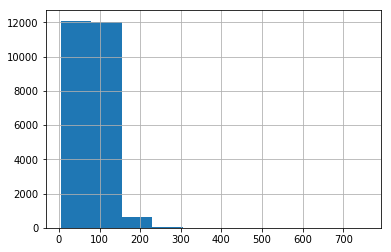

In [41]:
lens.hist();

In [42]:
COMMENT = 'tweet'
data[COMMENT].fillna("unknown", inplace=True)

In [43]:
df = data['tweet']

In [44]:
df.head()

16225    RT @LilTy___: Who do bitches take me for? &#12...
20077    RT @suckdisdpiece69: I'm gonna rock out with m...
2316     @1SonofYahweh he aint a real nigger, oh my bad...
4312                                @O3_Millz white bitch?
10472    I hate that my mom says she trying to move out...
Name: tweet, dtype: object

In [45]:
df.shape

(24783,)

In [46]:
y = data['class']

In [47]:
y.shape

(24783,)

In [48]:
df.describe()

count                                                 24783
unique                                                24783
top       I need a cowboy killer and a cold one about no...
freq                                                      1
Name: tweet, dtype: object

In [49]:
df.tail()

10708    I love fat bitches. That's my fucking problem....
1061     &#128588;&#128588;&#128588;"@Datruthh_: Don't ...
18489    RT @_reathie: "@1inkkofrosess: Any bitch that ...
4330         @OfficialCCane naah da twitter bird &#128542;
15940    RT @KaOs_GunnPlay: Ps4=a big booty hoe with ti...
Name: tweet, dtype: object

In [50]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 1783  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(data, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((23000,), (23000,), (1783,), (1783,))

In [51]:
X_train.head()

16225    RT @LilTy___: Who do bitches take me for? &#12...
20077    RT @suckdisdpiece69: I'm gonna rock out with m...
2316     @1SonofYahweh he aint a real nigger, oh my bad...
4312                                @O3_Millz white bitch?
10472    I hate that my mom says she trying to move out...
Name: tweet, dtype: object

In [52]:
X_valid.head()

13814        Peyton Manning is a goon fuck Eli's pussy ass
22685    When bae dodges hoes cause he only want you &#...
17764    RT @This_Sarcasm_: my tweet wasn't really abou...
12526    Lmaooo RT @Handsomeesco_55 She a tranny if she...
5509     @alwayznpolo fuck all cops. and fuck you too t...
Name: tweet, dtype: object

In [53]:
y_train.head()

16225    0
20077    0
2316     0
4312     0
10472    0
Name: class, dtype: int64

In [54]:
y_valid.head()

13814    0
22685    0
17764    0
12526    0
5509     0
Name: class, dtype: int64

In [55]:
raw_train.head()

,tweet,class
16225,RT @LilTy___: Who do bitches take me for? &#12...,0
20077,RT @suckdisdpiece69: I'm gonna rock out with m...,0
2316,"@1SonofYahweh he aint a real nigger, oh my bad...",0
4312,@O3_Millz white bitch?,0
10472,I hate that my mom says she trying to move out...,0


In [56]:
raw_train.shape

(23000, 2)

In [57]:
raw_valid.shape

(1783, 2)

In [58]:
raw_valid.head()

,tweet,class
13814,Peyton Manning is a goon fuck Eli's pussy ass,0
22685,When bae dodges hoes cause he only want you &#...,0
17764,RT @This_Sarcasm_: my tweet wasn't really abou...,0
12526,Lmaooo RT @Handsomeesco_55 She a tranny if she...,0
5509,@alwayznpolo fuck all cops. and fuck you too t...,0


## MODEL DEPLOYMENT 

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [60]:
#import re, string
#re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
#def tokenize(s): return re_tok.sub(r' \1 ', s).split()
import nltk
from nltk.tokenize import TweetTokenizer 
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

In [61]:
n = X_train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
trn_term_doc = vec.fit_transform(X_train)
test_term_doc = vec.transform(X_valid)

In [62]:
trn_term_doc, test_term_doc

(<23000x28887 sparse matrix of type '<class 'numpy.float64'>'
 	with 660094 stored elements in Compressed Sparse Row format>,
 <1783x28887 sparse matrix of type '<class 'numpy.float64'>'
 	with 49342 stored elements in Compressed Sparse Row format>)

In [63]:
#vec = CountVectorizer(tokenizer=tokenize)

In [64]:
#vec

In [65]:
#trn_doc = vec.fit_transform(X_train)
#val_doc = vec.transform(X_valid)

In [66]:
trn_doc = trn_term_doc

In [67]:
val_doc = test_term_doc

In [68]:
trn_doc[0]

<1x28887 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [69]:
vocab = vec.get_feature_names()

In [70]:
vocab[5000:5010]

['a typical',
 'a ugly',
 'a very',
 'a video',
 'a vine',
 'a virgin',
 'a walk',
 'a way',
 'a weak',
 'a wee']

In [71]:
w = set([o.lower() for o in X_train[0].split(' ')])

In [72]:
len(w)

22

## NAIVE BAYES 

In [73]:
x = trn_doc
x

<23000x28887 sparse matrix of type '<class 'numpy.float64'>'
	with 660094 stored elements in Compressed Sparse Row format>

In [74]:
trn_y = y_train.to_numpy()
type(trn_y)

numpy.ndarray

In [75]:
y_train.shape

(23000,)

In [76]:
trn_y.shape

(23000,)

In [77]:
trn_y.reshape(1, 23000)

array([[0, 0, 0, ..., 1, 0, 0]])

In [78]:
y = trn_y

In [79]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [80]:
p = x[y==1].sum(0)+1
q = x[y==0].sum(0)+1

In [81]:
p

matrix([[60.27742, 20.65904,  3.7741 , ...,  1.55914,  1.28886,  4.18901]])

In [82]:
p.shape

(1, 28887)

In [83]:
q

matrix([[256.76446, 119.64734,  18.14189, ...,   1.39843,   1.71226,   2.34963]])

In [84]:
q.shape

(1, 28887)

In [85]:
r = np.log((p/p.sum())/(q/q.sum()))

In [86]:
r

matrix([[-0.51901, -0.8262 , -0.63987, ...,  1.03897,  0.64613,  1.5084 ]])

In [87]:
r.shape

(1, 28887)

In [88]:
b = np.log(len(p)/len(q))

In [89]:
b

0.0

In [90]:
y_valid.shape

(1783,)

In [91]:
type(y_valid)

pandas.core.series.Series

In [92]:
val_y = y_valid.to_numpy()

In [93]:
type(val_y)

numpy.ndarray

In [94]:
val_y.reshape(1, 1783)

array([[0, 0, 0, ..., 0, 1, 0]])

In [95]:
pre_preds = val_doc @ r.T + b
preds = pre_preds.T>0
(preds==val_y).mean()

0.9254066180594503

In [96]:
pre_preds = val_doc.sign() @ r.T + b
preds = pre_preds.T > 0
(preds==val_y).mean()

0.8923163208076276

## LOGISTIC REGRESSION 

In [97]:
x

<23000x28887 sparse matrix of type '<class 'numpy.float64'>'
	with 660094 stored elements in Compressed Sparse Row format>

In [98]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [99]:
m = LogisticRegression(C=1e8, dual=True)
m.fit(x, y)
preds = m.predict(val_doc)
(preds==val_y).mean()

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9534492428491307

In [100]:
m = LogisticRegression(C=1e8, dual=True)
m.fit(trn_doc.sign(), y)
preds = m.predict(val_doc.sign())
(preds==val_y).mean()

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9495232753785754

In [103]:
m = LogisticRegression(C=0.1, dual=True)
m.fit(trn_doc, y)
preds = m.predict(val_doc)
(preds==val_y).mean()

0.8446438586651711

In [104]:
m = LogisticRegression(C=0.1, dual=True)
m.fit(trn_doc.sign(), y)
preds = m.predict(val_doc.sign())
(preds==val_y).mean()

0.9601794727986539

## TRI-GRAM MODEL DEPLOYMENT 

In [105]:
#vec = CountVectorizer(ngram_range=(1,3), tokenizer=tokenize, max_features=800000)

In [106]:
#vec

In [107]:
#trn_doc = vec.fit_transform(X_train)
#val_doc = vec.transform(X_valid)

In [108]:
n = X_train.shape[0]
vect = TfidfVectorizer(ngram_range=(1,4), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
trn_term_doc = vect.fit_transform(X_train)
test_term_doc = vect.transform(X_valid)

In [109]:
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=3,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=1,
        stop_words=None, strip_accents='unicode', sublinear_tf=1,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize at 0x7f275c8d1950>, use_idf=1,
        vocabulary=None)

In [110]:
trn_doc = trn_term_doc

In [111]:
val_doc = test_term_doc

In [112]:
trn_doc.shape

(23000, 49556)

In [113]:
vocab = vect.get_feature_names()

In [114]:
vocab[20000:20005]

['didn', 'didn &', 'didn & #', 'didn & # 8217', "didn '"]

In [115]:
trn_y

array([0, 0, 0, ..., 1, 0, 0])

In [116]:
y = trn_y

In [117]:
val_y

array([0, 0, 0, ..., 0, 1, 0])

In [118]:
x = trn_doc.sign()
x

<23000x49556 sparse matrix of type '<class 'numpy.float64'>'
	with 876875 stored elements in Compressed Sparse Row format>

In [119]:
val_x = val_doc.sign()
val_x

<1783x49556 sparse matrix of type '<class 'numpy.float64'>'
	with 64549 stored elements in Compressed Sparse Row format>

In [120]:
p = x[y==1].sum(0)+1
q = x[y==0].sum(0)+1
r = np.log((p/p.sum())/(q/q.sum()))
b = np.log(len(p)/len(q))

In [121]:
pre_preds = val_x @ r.T + b
preds = pre_preds.T>0
(preds==val_y).mean()

0.9158721256309591

In [122]:
m = LogisticRegression(C=0.1, dual=True)
m.fit(x,y)
preds = m.predict(val_x)
(preds==val_y).mean()

0.957375210319686

In [123]:
r.shape

(1, 49556)

In [124]:
r

matrix([[-0.01104, -0.32685, -0.34779, ...,  1.39895,  0.7058 ,  1.85093]])

In [125]:
np.exp(r)

matrix([[0.98902, 0.72119, 0.70625, ..., 4.05093, 2.02547, 6.36575]])

In [126]:
x_nb = x.multiply(r)
m = LogisticRegression(C=0.1, dual=True)
m.fit(x_nb,y)

val_x_nb = val_x.multiply(r)
preds = m.predict(val_x_nb)
(preds==val_y).mean()

0.9663488502523836

## RETRIVING TOP WORDS FROM HATE DATASET 

In [131]:
data = shuffle(data)
data.head(20)

,tweet,class
15407,RT @HBCUfessions: I know if my bf breaks up w/...,0
17302,RT @ShmurdaGang: Free wop,1
7473,"A white lighter is bad luck, not yellow ur stupid",1
24374,pussy so good got me running through the hood,0
11642,If you got a nigga and you another nigga #wcw ...,0
22566,"Well now that I'm basically gone full retard, ...",0
22306,Twitter niggas always want you to have unprote...,0
24278,no flex zone.... hoe,0
3676,@Joe_Schmucc Dog Government jobs is the SHIT. ...,0
21361,That bitch called on Thor for some strength. &...,0


In [132]:
data_hate_one = data.loc[data['class'] == 0]

In [133]:
data_hate_one.head()

,tweet,class
15407,RT @HBCUfessions: I know if my bf breaks up w/...,0
24374,pussy so good got me running through the hood,0
11642,If you got a nigga and you another nigga #wcw ...,0
22566,"Well now that I'm basically gone full retard, ...",0
22306,Twitter niggas always want you to have unprote...,0


In [134]:
data_hate_one.shape

(20620, 2)

In [135]:
with open('a_hate_one', 'wb') as fp:
    pickle.dump(data_hate_one, fp)

In [136]:
data_unhate_one = data.loc[data['class'] == 1]

In [137]:
data_unhate_one.head()

,tweet,class
17302,RT @ShmurdaGang: Free wop,1
7473,"A white lighter is bad luck, not yellow ur stupid",1
20965,So much more going on but hypocrisy doesn't si...,1
17403,RT @SportsCenter: Yankees survive 9th-inning s...,1
16863,RT @PapaRockk_: My mom paid $5 to hold this mo...,1


In [138]:
data_unhate_one.shape

(4163, 2)

In [139]:
4163+20620

24783

In [140]:
data.shape

(24783, 2)

In [141]:
with open('a_unhate_one', 'wb') as fp:
    pickle.dump(data_unhate_one, fp)

In [142]:
hate_df = data_hate_one['tweet']

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [152]:
one = TfidfVectorizer(ngram_range=(1,3), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )

In [153]:
one

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=3,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=1,
        stop_words=None, strip_accents='unicode', sublinear_tf=1,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize at 0x7f275c8d1950>, use_idf=1,
        vocabulary=None)

In [154]:
trn_term_doc = one.fit_transform(hate_df)

In [155]:
trn_term_doc

<20620x37790 sparse matrix of type '<class 'numpy.float64'>'
	with 712676 stored elements in Compressed Sparse Row format>

In [156]:
indices_hate = np.argsort(one.idf_)[::-1]
features_hate = one.get_feature_names()
top_n = 100
top_features_hate = [features_hate[i] for i in indices_hate[:top_n]]
print(top_features_hate)

['cut this bitch', 'but cant', 'on twitter but', '@ whalelookyhere', 'on twitter ,', '@ whattheffacts', 'on tv ?', 'on top of', '@ whatupag', 'fuck does this', 'on this here', '@ whereyohussleat :', 'on they bitch', '@ whiteboicoleman', 'fuck her mouth', 'on the way', '@ whoelsebutkey', 'on the team', 'fuck her pussy', 'but as a', 'on the radio', 'on the other', '@ whyyousoshort', '@ wigga32', 'on the gram', 'but act like', 'on the door', '@ wisdom', '@ wisdom _', 'fuck did', 'but da', '@ watch', 'on what', 'one loyal', 'one likes you', '@ watch _', 'fuck around and', 'one good girl', 'one friend', 'one fag', 'one direction', '@ waymothegod', 'one can', 'one bit .', 'one bit', 'fuck bitch', 'one ?', 'but every', 'fuck bitches &', 'one ! !', 'once again', 'once a', 'ona bitch', 'on your own', '@ wellheeledking', 'on you bitch', 'on you ,', '@ wendydavistexas @', 'on yo main', 'on with', 'but act', '@ wodaeeex3 @', 'on sunday', 'on stupid', 'on http', 'on house arrest', 'on hoes', '@ you

### SAVING TOP WORDS FROM HATE 

In [157]:
indices_hate = np.argsort(one.idf_)[::-1]
features_hate = one.get_feature_names()
top_n = 5000
top_features_hate = [features_hate[i] for i in indices_hate[:top_n]]

In [158]:
with open('z_hate_one', 'wb') as fp:
    pickle.dump(top_features_hate, fp)

## RETRIVING TOP WORDS FROM UNHATE DATASET 

In [159]:
data_unhate_one.head()

,tweet,class
17302,RT @ShmurdaGang: Free wop,1
7473,"A white lighter is bad luck, not yellow ur stupid",1
20965,So much more going on but hypocrisy doesn't si...,1
17403,RT @SportsCenter: Yankees survive 9th-inning s...,1
16863,RT @PapaRockk_: My mom paid $5 to hold this mo...,1


In [160]:
unhate_df = data_unhate_one['tweet']

In [161]:
unhate_df.head()

17302                            RT @ShmurdaGang: Free wop
7473     A white lighter is bad luck, not yellow ur stupid
20965    So much more going on but hypocrisy doesn't si...
17403    RT @SportsCenter: Yankees survive 9th-inning s...
16863    RT @PapaRockk_: My mom paid $5 to hold this mo...
Name: tweet, dtype: object

In [162]:
trn_term_doc = one.fit_transform(unhate_df)

In [163]:
trn_term_doc

<4163x7873 sparse matrix of type '<class 'numpy.float64'>'
	with 124260 stored elements in Compressed Sparse Row format>

In [164]:
indices_unhate = np.argsort(one.idf_)[::-1]
features_unhate = one.get_feature_names()
top_n = 100
top_features_unhate = [features_unhate[i] for i in indices_unhate[:top_n]]
print(top_features_unhate)

['a pet monkey', '2 #', 'race traitor', 'for "', 'for $', 'r the', 'r )', 'for .', 'quote', 'quite', 'for an oreo', '@ s', 'que', 'quality', 'for brownies', 'for dinner', 'put them', 'put the', 'for the #', 'pussy cats inside', 'pussy cats', 'for the @', '187 ; http', 'races', "' the", '2 birds', 'racist @ norahodonnell', 'foam', 're gonna', 're an egg', 're an', 'focus', 'rats', 'folk .', "' t wanna", 'rate', 'rare', 'rappers dm me', 'rappers dm', 'followers', 'following', 'rangel :', '@ rpopbox', 'food ,', 'rams', 'food from', 'food from outside', 'racist and', 'for the follow', 'purpose is to', 'purpose is', 'purpose .', 'forward to', 'pressure', 'foul', '( @', 'found a', 'found on', 'pre -', 'pre', 'fox news', 'france', 'powder', 'pound', 'free bird', 'free birds', 'pot brownie', 'freshman', 'friday .', '( r )', 'possible', 'possession of', 'positive', 'pretty much', 'primary', 'prime', 'proven', 'for the great', 'for the royals', 'pure trash', 'for the sole', 'pumpkin', 'pump', 'p

### SAVING THE TOP WORDS FROM UNHATE DATASET 

In [165]:
indices_unhate = np.argsort(one.idf_)[::-1]
features_unhate = one.get_feature_names()
top_n = 5000
top_features_unhate = [features_unhate[i] for i in indices_unhate[:top_n]]

In [166]:
with open('z_unhate_one', 'wb') as fp:
    pickle.dump(top_features_unhate, fp)